In [1]:
import gammapy
gammapy.__version__

'0.19'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from regions import CircleSkyRegion, RectangleSkyRegion
from gammapy.datasets import MapDataset

In [3]:
base_dataset = MapDataset.read("../STACKED.fits")
geom=base_dataset._geom

empty= MapDataset.from_geoms(geom, base_dataset.exposure.geom)
cutout = base_dataset.cutout(geom.center_skydir, width=(1, 1)*u.deg)
empty.counts.data = np.zeros_like(empty.counts.data)

<WCSAxesSubplot:xlabel='Galactic Longitude', ylabel='Galactic Latitude'>

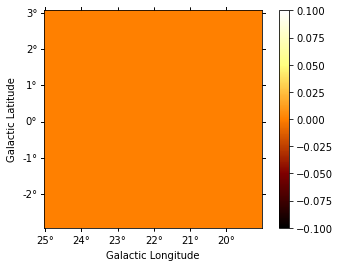

In [4]:
empty.counts.sum_over_axes().plot(add_cbar=True)

In [5]:
empty.exposure.meta

{}

<WCSAxesSubplot:xlabel='Galactic Longitude', ylabel='Galactic Latitude'>

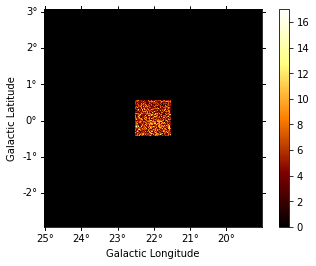

In [6]:
empty.stack(cutout)
empty.counts.sum_over_axes().plot(add_cbar=True)

In [7]:
empty.exposure.meta

{'livetime': <Quantity 359201.509058 s>}

# Check the livetime for an empty cutout

/home/lucagiunti/miniconda3/envs/gammapy-0.19/lib/python3.9/site-packages/regions/shapes/rectangle.py:201: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Rectangle(xy=xy, width=width, height=height,


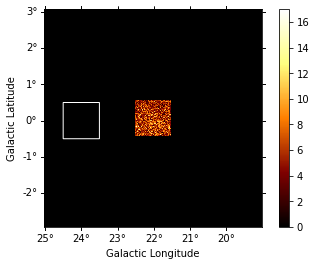

In [8]:
skydir = SkyCoord(24, 0, unit=u.deg, frame="galactic")
cutout_region = RectangleSkyRegion(skydir, width=1 * u.deg, height=1 * u.deg)
empty.counts.sum_over_axes().plot(add_cbar=True)
ax = plt.gca()
artist = cutout_region.to_pixel(wcs=ax.wcs).as_artist(color="w")
ax.add_artist(artist)

In [9]:
empty.cutout(skydir, (1, 1)*u.deg).info_dict()["livetime"]

<Quantity 359201.509058 s>

It is nonzero!

# Check the livetime for an empty spectrum dataset

/home/lucagiunti/miniconda3/envs/gammapy-0.19/lib/python3.9/site-packages/regions/shapes/circle.py:161: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Circle(xy=xy, radius=radius, **mpl_kwargs)


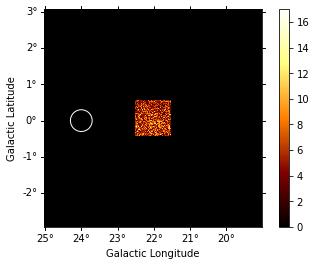

In [10]:
skydir = SkyCoord(24, 0, unit=u.deg, frame="galactic")
ON_region = CircleSkyRegion(skydir, radius=0.3 * u.deg)
empty.counts.sum_over_axes().plot(add_cbar=True)
ax = plt.gca()
artist = ON_region.to_pixel(wcs=ax.wcs).as_artist(color="w")
ax.add_artist(artist)

In [11]:
spectrum_dataset = empty.to_spectrum_dataset(ON_region)

In [12]:
spectrum_dataset.info_dict()["livetime"]

<Quantity 359201.509058 s>

It is nonzero!